# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [33]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
#pasta_resultado_af_xdp= 'resultados_af_xdp2'
pasta_resultado_af_xdp= 'resultados_af_xdp3'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF e AF_XDP: ----------------
df_perf_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_perf.csv', sep=',', engine='python')
df_perf_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_perf.csv', sep=',', engine='python')

#normalizacao dos dados af_xdp
df_perf_af_xdp['hook_ebpf']= df_perf_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')

#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_perf= pd.concat([df_perf_ebpf,df_perf_af_xdp], sort = False)

In [25]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

lista_tipo_programa= ['ebpf','af_xdp']

# Normalização dos datasets

In [34]:
#antes de executar isso, eliminar ultima coluna dos arquivos perf que estão em branco

df_perf['hook_ebpf']= df_perf['hook_ebpf'].replace('af_xdp','AF_XDP')
df_perf['hook_ebpf']= df_perf['hook_ebpf'].replace('xdpgeneric','Generic')
df_perf['hook_ebpf']= df_perf['hook_ebpf'].replace('xdpdrv','Native')

colunas= ['combined', 'algoritmo', 'hook_ebpf', 'packet_size', 'instructions', 
       'branches', 'branch_misses', 'L1_dcache_loads', 'L1_dcache_load_misses', 
       'LLC_loads']

df_perf= df_perf[colunas]
for i in colunas:
  df_perf[f'{i}']= df_perf[f'{i}'].astype(str)

for i,j in zip(lista_for,lista_alias_for):
       df_perf['algoritmo']= df_perf['algoritmo'].replace(f'{i}',f'{j}')

df_perf['algoritmo']= df_perf['algoritmo'].astype(int)


df_perf= df_perf.replace('<notcounted>','0')
df_perf= df_perf.replace('.','')

colunas= ['packet_size', 'instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses', 'LLC_loads']

for i in colunas:
  df_perf[f'{i}']= df_perf[f'{i}'].astype(int)

In [30]:
format_imagens= '.pdf'
df_perf

,combined,algoritmo,hook_ebpf,packet_size,instructions,branches,branch_misses,L1_dcache_loads,L1_dcache_load_misses,LLC_loads
4,4,12800,AF_XDP,1024,1039032,1027568,209008,7852,274415,16131
5,2,200,AF_XDP,1024,1026808,1019429,207318,7794,271802,15530
6,8,3200,AF_XDP,1024,1671307,1489249,287832,8268,417137,28840
11,2,800,AF_XDP,1024,1000599,1006188,204834,7393,268618,14282
19,2,3200,AF_XDP,1024,1423598,1239473,246334,8599,338564,19196
...,...,...,...,...,...,...,...,...,...,...
419,8,3200,Native,64,1598993,1019264,207361,7867,272196,0
445,1,1,Native,64,948028,1004905,204451,8061,268010,0
454,4,3200,Native,64,944494,1004066,204574,7897,267964,18691
458,1,100,Native,64,946734,1013086,206395,7622,270512,20968


# Resultados para ***Instruções***

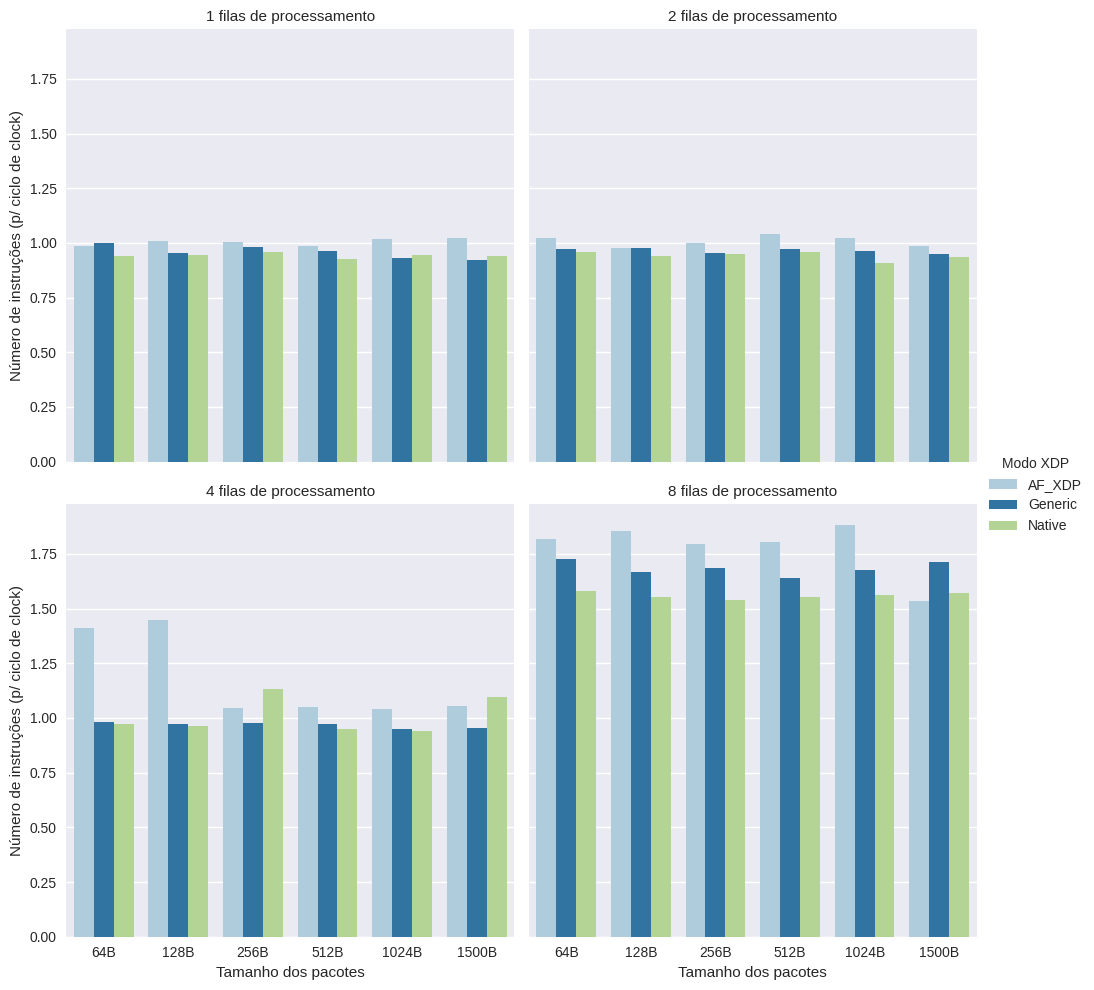

In [61]:
#

algoritmo= 12800

#packet_size= 1024
#hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'packet_size'
eixo_y= 'instructions'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df['instructions']= df['instructions']/1000000
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
#df= df[df.combined == combined]                  #filtra por quantidade de filas TX/RX especifica
#df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
#df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})

df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='combined', hue='Modo XDP',
    kind="bar", palette='Paired', col_wrap=2
)
grafico.set_ylabels("Número de instruções (p/ ciclo de clock)")
grafico.set_xlabels("Tamanho dos pacotes")
grafico.set_titles("{col_name} filas de processamento")

grafico.savefig(f'{raiz}/instrucoes_{hue}_x_{eixo_x}@alg_{algoritmo}{format_imagens}')

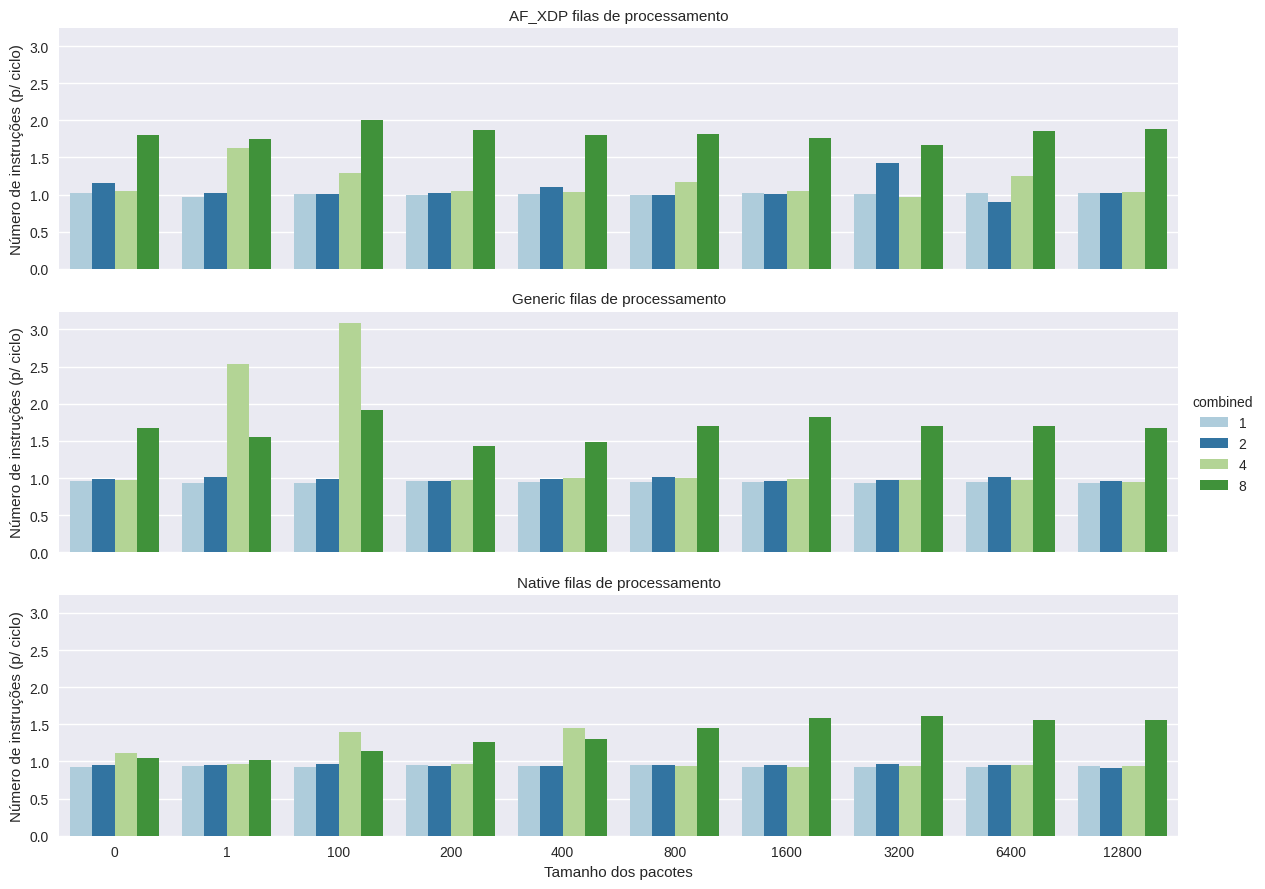

In [58]:
#

packet_size= 1024
#hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'algoritmo'
eixo_y= 'instructions'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_perf= df_perf.sort_values(by=[eixo_x,hue,'combined'], ascending=True)       #ordena dados com os valores do eixo x

df= df_perf.copy()
df['instructions']= df['instructions']/1000000
#df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
#df= df[df.combined == combined]                  #filtra por quantidade de filas TX/RX especifica
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
#df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})


df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='Modo XDP', hue='combined',
    kind="bar", palette='Paired', col_wrap=1,
    height= 3, aspect=12/3
)
grafico.set_ylabels("Número de instruções (p/ ciclo)")
grafico.set_xlabels("Tamanho dos pacotes")
grafico.set_titles("{col_name} filas de processamento")

#grafico.savefig(f'{raiz}/instrucoes_{hue}_x_{eixo_x}@alg_{algoritmo}{format_imagens}')

# Resultados para ***Branchs***

# Resultados para ***Loads***